In [9]:
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.models import Model
from keras.layers import Dense, Input

In [2]:
(X_train, _), (X_test, _) = mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

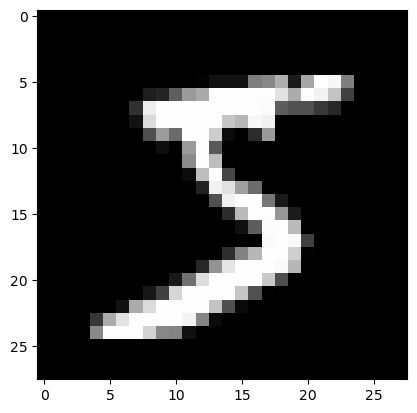

In [4]:
plt.imshow(X_train[0], cmap="gray")

In [5]:
# Normalizing the data
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

In [6]:
# Flatten the images
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))

In [7]:
# Adding noise to the data
X_train_noisy = X_train + 0.3 * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)
X_test_noisy = X_test + 0.3 * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape)

In [8]:
X_train_noisy = np.clip(X_train_noisy, 0.0, 1.0)
X_test_noisy = np.clip(X_test_noisy, 0.0, 1.0)

In [10]:
# Building the model

# Shape 784 = 28 * 28
inputs = Input(shape=(784,))

# Encoder
encoder = Dense(32, activation="relu")(inputs)

# Decoder
decoder = Dense(784, activation="sigmoid")(encoder)

# Autoencoder
autoencoder = Model(inputs, decoder)

autoencoder.compile(optimizer="adam", loss="binary_crossentropy")

autoencoder.fit(
    X_train_noisy,
    X_train,
    epochs=100,
    batch_size=256,
    shuffle=True,
    validation_data=(X_test_noisy, X_test),
)

2025-01-03 14:52:34.832725: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/100


2025-01-03 14:52:35.636341: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.3693 - val_loss: 0.1932
Epoch 2/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1840 - val_loss: 0.1617
Epoch 3/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1584 - val_loss: 0.1446
Epoch 4/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1429 - val_loss: 0.1321
Epoch 5/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1311 - val_loss: 0.1229
Epoch 6/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1229 - val_loss: 0.1173
Epoch 7/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1179 - val_loss: 0.1139
Epoch 8/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1140 - val_loss: 0.1105
Epoch 9/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1116 - val_loss: 0.1092
Epoch 10/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1099 - val_loss: 0.1084
Epoch 11/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1096 - val_loss: 0.1081
Epoch 12/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step

In [31]:
idx = np.random.randint(0, X_test.shape[0])

original_image = X_test[idx]

In [32]:
noisy_image = original_image + 0.3 * np.random.normal(loc=0.0, scale=1.0, size=original_image.shape)

noisy_image = np.clip(noisy_image, 0.0, 1.0)

In [33]:
denoised_image = autoencoder.predict(np.expand_dims(noisy_image, axis=0))

denoised_image = denoised_image.reshape(28, 28)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


(-0.5, 27.5, 27.5, -0.5)

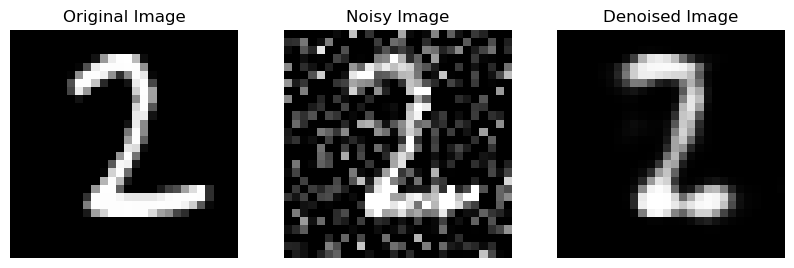

In [34]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 3, 1)
plt.imshow(original_image.reshape(28, 28), cmap="gray")
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(noisy_image.reshape(28, 28), cmap="gray")
plt.title("Noisy Image")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(denoised_image, cmap="gray")
plt.title("Denoised Image")
plt.axis("off")